In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.graph_objects as go



In [27]:
df=pd.read_csv('/content/covid_19_india.csv')
print(df)

       Sno      Date     Time  ...  Cured Deaths Confirmed
0        1  30/01/20  6:00 PM  ...      0      0         1
1        2  31/01/20  6:00 PM  ...      0      0         1
2        3  01/02/20  6:00 PM  ...      0      0         2
3        4  02/02/20  6:00 PM  ...      0      0         3
4        5  03/02/20  6:00 PM  ...      0      0         3
...    ...       ...      ...  ...    ...    ...       ...
5086  5087  11/08/20  8:00 AM  ...  59374    645     82647
5087  5088  11/08/20  8:00 AM  ...   4656     43      6372
5088  5089  11/08/20  8:00 AM  ...   6301    134     10021
5089  5090  11/08/20  8:00 AM  ...  76724   2120    126722
5090  5091  11/08/20  8:00 AM  ...  70328   2100     98459

[5091 rows x 9 columns]


In [28]:
df.shape
#df.head()
df.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5081,5082,11/08/20,8:00 AM,Puducherry,-,-,3355,89,5624
5082,5083,11/08/20,8:00 AM,Punjab,-,-,15735,604,24889
5083,5084,11/08/20,8:00 AM,Rajasthan,-,-,39060,800,53670
5084,5085,11/08/20,8:00 AM,Sikkim,-,-,510,1,910
5085,5086,11/08/20,8:00 AM,Tamil Nadu,-,-,244675,5041,302815
5086,5087,11/08/20,8:00 AM,Telengana,-,-,59374,645,82647
5087,5088,11/08/20,8:00 AM,Tripura,-,-,4656,43,6372
5088,5089,11/08/20,8:00 AM,Uttarakhand,-,-,6301,134,10021
5089,5090,11/08/20,8:00 AM,Uttar Pradesh,-,-,76724,2120,126722
5090,5091,11/08/20,8:00 AM,West Bengal,-,-,70328,2100,98459


In [29]:
#checking null value 
df.isnull().sum()
#remove null value
df.dropna() 

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
5086,5087,11/08/20,8:00 AM,Telengana,-,-,59374,645,82647
5087,5088,11/08/20,8:00 AM,Tripura,-,-,4656,43,6372
5088,5089,11/08/20,8:00 AM,Uttarakhand,-,-,6301,134,10021
5089,5090,11/08/20,8:00 AM,Uttar Pradesh,-,-,76724,2120,126722


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       5091 non-null   int64 
 1   Date                      5091 non-null   object
 2   Time                      5091 non-null   object
 3   State/UnionTerritory      5091 non-null   object
 4   ConfirmedIndianNational   5091 non-null   object
 5   ConfirmedForeignNational  5091 non-null   object
 6   Cured                     5091 non-null   int64 
 7   Deaths                    5091 non-null   int64 
 8   Confirmed                 5091 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 358.1+ KB


In [31]:
df_up=df.loc[(df['State/UnionTerritory']=='Uttar Pradesh')]#fetching data of Uttar Pradesh 

In [32]:
df_up.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_up.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
4774,4775,02/08/20,8:00 AM,Uttar Pradesh,-,-,51334,1677,89048
4809,4810,03/08/20,8:00 AM,Uttar Pradesh,-,-,53168,1730,92921
4844,4845,04/08/20,8:00 AM,Uttar Pradesh,-,-,55393,1778,97362
4879,4880,05/08/20,8:00 AM,Uttar Pradesh,-,-,57271,1817,100310
4914,4915,06/08/20,8:00 AM,Uttar Pradesh,-,-,60558,1857,104388
4949,4950,07/08/20,8:00 AM,Uttar Pradesh,-,-,63402,1918,108974
4984,4985,08/08/20,8:00 AM,Uttar Pradesh,-,-,66834,1981,113378
5019,5020,09/08/20,8:00 AM,Uttar Pradesh,-,-,69833,2028,118038
5054,5055,10/08/20,8:00 AM,Uttar Pradesh,-,-,72650,2069,122609
5089,5090,11/08/20,8:00 AM,Uttar Pradesh,-,-,76724,2120,126722


In [34]:
import plotly.offline as py
import plotly.graph_objects as go


In [35]:
con_chart=go.Scatter(x=df_up['Date'],y=df_up['Confirmed'],name='Confirmed Rate')
cured_chart=go.Scatter(x=df_up['Date'],y=df_up['Cured'],name='Cured Rate')
death_chart=go.Scatter(x=df_up['Date'],y=df_up['Deaths'],name='Death Rate')
py.iplot([con_chart,cured_chart,death_chart])

In [36]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

dfc=df_up[['Confirmed']]
dfc=dfc.values
#dfc

#Train and Test data Set

In [37]:
traind_size=int(len(dfc)*0.70)
testd_size=len(dfc)-traind_size
train,test=dfc[0:traind_size,:],dfc[traind_size:len(dfc):]
train.shape

(112, 1)

In [38]:
test.shape

(49, 1)

In [39]:
def create_pred(dataset,look_backword):
  datax,datay=[],[]
  for i in range(len(dataset)-look_backword-1):
    a=dataset[i:(i+look_backword),0]
    datax.append(a)
    datay.append(dataset[i+look_backword,0])
  return np.array(datax),np.array(datay)



In [40]:
look_backword=2
trainx,trainy=create_pred(train,look_backword=look_backword)
testx,testy=create_pred(test,look_backword=look_backword)


In [42]:
model=LinearSVR()
model.fit(trainx,trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [43]:
predict_f=model.predict(testx)

In [45]:
df_r=pd.DataFrame({'Actual':testy.flatten(),'Predicted':predict_f.flatten()})
df_r.head(10)

,Actual,Predicted
0,20193,20316.119951
1,20943,20966.121362
2,21549,21764.213349
3,22147,22358.352831
4,22828,22973.454483
5,23492,23693.715857
6,24056,24374.961370
7,24825,24935.230608
8,25797,25772.468124
9,26554,26818.664792


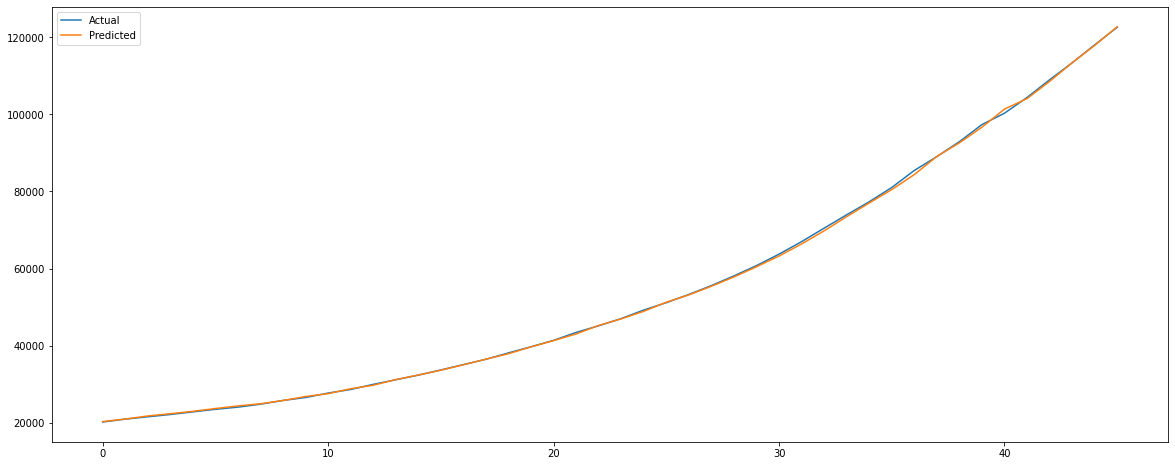

In [46]:
df_r.plot(figsize=(20, 8))


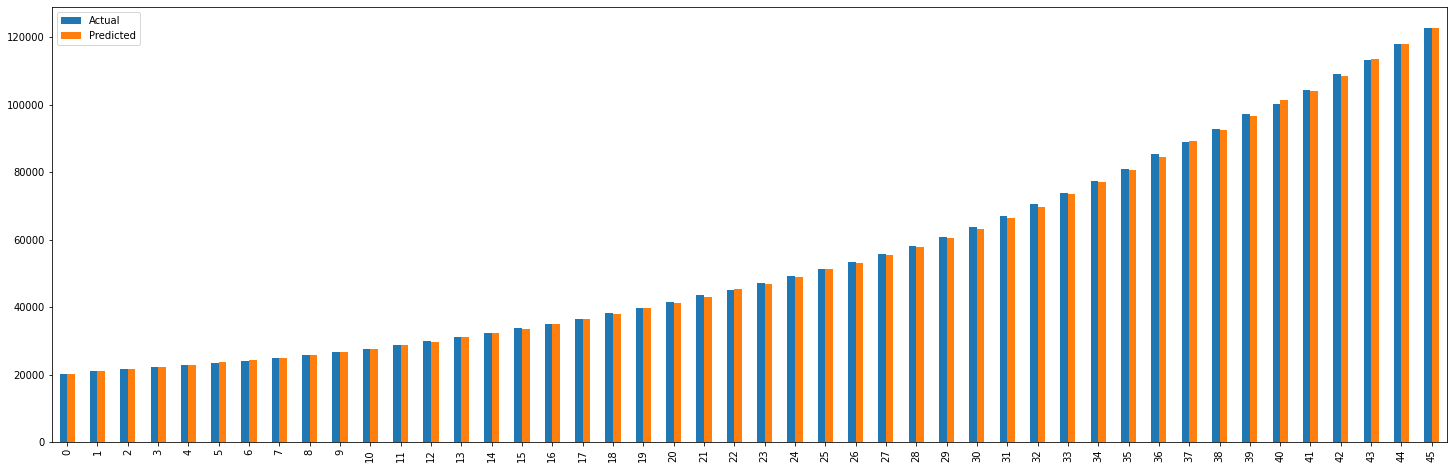

In [47]:
df_r.plot(kind='bar',figsize=(25,8))